In [96]:
import gzip
from Bio import SeqIO
import itertools
import os
from fnmatch import fnmatch
import numpy as np
import pandas as pd
from collections import OrderedDict
import Levenshtein
from scipy.spatial.distance import pdist, squareform 


in_dir = "/Users/natem/Downloads/temp"

SAMPLES = OrderedDict()

for f in os.listdir( in_dir ):
    if fnmatch( f, "*R1.fastq.gz" ):
        fsplit = f.split( "_" )
        if fsplit[0] not in SAMPLES:
            SAMPLES[fsplit[0]] = [f]
        else:
            SAMPLES[fsplit[0]].append( f )
for f in os.listdir( in_dir ):
    if fnmatch( f, "*R2.fastq.gz" ):
        fsplit = f.split( "_" )
        if fsplit[0] not in SAMPLES:
            SAMPLES[fsplit[0]] = [f]
        else:
            SAMPLES[fsplit[0]].append( f )
SAMPLES

OrderedDict([('S4', ['S4_R1.fastq.gz', 'S4_R2.fastq.gz']),
             ('S8', ['S8_R1.fastq.gz', 'S8_R2.fastq.gz']),
             ('S1', ['S1_R1.fastq.gz', 'S1_R2.fastq.gz']),
             ('S2', ['S2_R1.fastq.gz', 'S2_R2.fastq.gz']),
             ('NegRT', ['NegRT_R1.fastq.gz', 'NegRT_R2.fastq.gz']),
             ('C3', ['C3_R1.fastq.gz', 'C3_R2.fastq.gz']),
             ('S7', ['S7_R1.fastq.gz', 'S7_R2.fastq.gz']),
             ('S9', ['S9_R1.fastq.gz', 'S9_R2.fastq.gz']),
             ('S5', ['S5_R1.fastq.gz', 'S5_R2.fastq.gz']),
             ('C2', ['C2_R1.fastq.gz', 'C2_R2.fastq.gz']),
             ('S6', ['S6_R1.fastq.gz', 'S6_R2.fastq.gz']),
             ('S10', ['S10_R1.fastq.gz', 'S10_R2.fastq.gz']),
             ('S3', ['S3_R1.fastq.gz', 'S3_R2.fastq.gz']),
             ('NegLP', ['NegLP_R1.fastq.gz', 'NegLP_R2.fastq.gz'])])

In [2]:
umi_dict = dict()

for i in SAMPLES.items():
    with gzip.open( os.path.join( in_dir, i[1] ), "rt" ) as handle:
        for record in SeqIO.parse(handle, "fastq"):
            print( record.description )
            umi = record.description.split( ":" )[1]
            if umi in umi_dict:
                umi_dict[umi].append( str( record.seq ) )
            else:
                umi_dict[umi] = [str( record.seq )]


MIG.21018 R2 UMI:CGTACATTAATC:110
MIG.9079 R2 UMI:GTCAGCTAACAA:38
MIG.188 R2 UMI:GCCAGTGTGGGG:47
MIG.23299 R2 UMI:GGGCAACGTGGG:130
MIG.1501 R2 UMI:CCTAAGCACAAC:36
MIG.6119 R2 UMI:TAGGCAGACTGT:79
MIG.9213 R2 UMI:CCTCGTTAGGTG:66
MIG.1510 R2 UMI:GGGGCAATTGAA:32
MIG.358 R2 UMI:CGAGATACGATT:48
MIG.21060 R2 UMI:GTCGTACCACAG:54
MIG.3786 R2 UMI:CACACACTGGGG:119
MIG.3443 R2 UMI:CGTCTATAGTTG:33
MIG.20584 R2 UMI:GAAGGGGTGAAT:43
MIG.9286 R2 UMI:GCCCGCAAGTGA:52
MIG.15146 R2 UMI:GTGCATCGAGTT:104
MIG.20041 R2 UMI:GGTAGAGTGTTT:32
MIG.21187 R2 UMI:CAGAAGATATAA:37
MIG.6232 R2 UMI:CACCCCACTTGT:59
MIG.4213 R2 UMI:ACAAGCGGGATA:33
MIG.6245 R2 UMI:TGGCATGAGTTT:38
MIG.9719 R2 UMI:CCGTTCGTATAT:56
MIG.9732 R2 UMI:GTGCTGATTTGT:35
MIG.6302 R2 UMI:CGGGTGAGAGTT:65
MIG.10747 R2 UMI:GTGCCCGGCAGT:103
MIG.18100 R2 UMI:TCTAATTTCGCA:286
MIG.21662 R2 UMI:GGACGGTGCAGG:45
MIG.18160 R2 UMI:GGGCTGAGGTTT:59
MIG.9947 R2 UMI:GCTACCGAGTTA:198
MIG.18271 R2 UMI:CGGCGGGACTGT:46
MIG.13866 R2 UMI:CTTTCGGCGGGG:32
MIG.13869 R2 UMI:CGAAA

MIG.11800 R2 UMI:AAGCGTTGCTTA:128
MIG.8876 R2 UMI:TACATTCGGTAA:12
MIG.5405 R2 UMI:AAAGCGAGTCCA:72
MIG.23440 R2 UMI:CCGAGCGCCTTG:180
MIG.139 R2 UMI:GCACTAACCGGG:102
MIG.173 R2 UMI:ACGTTGAGTGAT:11
MIG.976 R2 UMI:TTATCTTGTATG:52
MIG.2113 R2 UMI:AAGAGCAAGATG:51
MIG.4737 R2 UMI:ATCGACGTGTCG:41
MIG.34771 R2 UMI:ATTAAGCATTAA:138
MIG.69485 R2 UMI:TGAGTTGTAGAT:118
MIG.8878 R2 UMI:TGACTCGCAATA:15
MIG.979 R2 UMI:GACATTAGCGAC:15
MIG.2400 R2 UMI:GAGTGGATAAAC:173
MIG.8909 R2 UMI:GCTGTCATATAA:10
MIG.18997 R2 UMI:ATTAGGGCATGA:140
MIG.80998 R2 UMI:GACCGTCAATTT:311
MIG.34775 R2 UMI:CGATTAGTCAGT:42
MIG.86615 R2 UMI:GAGATTTAGGAC:136
MIG.20382 R2 UMI:TGACATAGGGAT:143
MIG.4750 R2 UMI:AAACGCGGCTAG:8
MIG.81023 R2 UMI:TCTATACACGGT:10
MIG.2416 R2 UMI:ATTACTGCCATT:45
MIG.2119 R2 UMI:AATAGTCTTTGT:27
MIG.6023 R2 UMI:AGAAATGAATCA:156
MIG.5413 R2 UMI:CATAATTGCTAC:113
MIG.34792 R2 UMI:CATAAAGAAGTG:25
MIG.20390 R2 UMI:TTACAATTTCGA:41
MIG.46324 R2 UMI:GCAGGAGGCTTT:197
MIG.2449 R2 UMI:AACCTTCTCACA:16
MIG.4765 R2 UMI:CTA

MIG.89895 R2 UMI:AATCGTACTATG:19
MIG.43283 R2 UMI:TCTATGTAGCAG:13
MIG.88163 R2 UMI:GAAACTGCGGCA:50
MIG.89909 R2 UMI:TTCGTACATGAG:8
MIG.13876 R2 UMI:AATACAGTGTGA:62
MIG.10636 R2 UMI:TCTTTAGTCAGA:54
MIG.41474 R2 UMI:TAGACACAGATT:68
MIG.75958 R2 UMI:GGCTTTCATTTT:37
MIG.43296 R2 UMI:CGTGTGAGTGGC:33
MIG.15566 R2 UMI:TCGACAACCTTG:208
MIG.82796 R2 UMI:ATAGGGAGTATT:106
MIG.7706 R2 UMI:ACGGTTAGGGAG:112
MIG.15569 R2 UMI:AAACTAGTTTTG:8
MIG.25712 R2 UMI:AACTTACTACAC:43
MIG.71638 R2 UMI:GTTTGTTGGGTA:72
MIG.92053 R2 UMI:GCACCGTTGAAA:48
MIG.37575 R2 UMI:GTGCAATGAGAG:106
MIG.10652 R2 UMI:GCATACTAAATA:18
MIG.37577 R2 UMI:AGTCGCTTCGTT:9
MIG.89939 R2 UMI:AGGTCTACAAGA:50
MIG.13898 R2 UMI:CCAAAGACGGTG:48
MIG.10660 R2 UMI:ACTATGTTATCA:15
MIG.28986 R2 UMI:GACAAATTAGAG:89
MIG.15599 R2 UMI:GGCACCTCCATG:34
MIG.82817 R2 UMI:ATAGTGTACTGT:17
MIG.13924 R2 UMI:GTAAAACTTGCG:16
MIG.7720 R2 UMI:TGTGAGGGATGG:34
MIG.41494 R2 UMI:TGGAAGGAAGGT:102
MIG.84890 R2 UMI:CAAAGTATCCGT:202
MIG.25713 R2 UMI:CACAGACCAGGT:41
MIG.71640

MIG.56217 R2 UMI:ATTTGGTTGAAA:47
MIG.56235 R2 UMI:ACCCAATGGAAA:13
MIG.31232 R2 UMI:CGAACCAGCGTA:238
MIG.64602 R2 UMI:GAGAAGGGCTGA:74
MIG.31260 R2 UMI:GGTGGAAATCAG:11
MIG.79768 R2 UMI:GTGTGGGAGCGC:8
MIG.78439 R2 UMI:TGACTGTAACTT:62
MIG.73824 R2 UMI:TTCCTAAACGTG:36
MIG.27827 R2 UMI:TTTTTAACCGGT:97
MIG.79784 R2 UMI:GGACAAACCGGT:14
MIG.56246 R2 UMI:CTCACGCGGGAG:50
MIG.54775 R2 UMI:ACCTAGCATAAC:70
MIG.67333 R2 UMI:GCATATACAATA:71
MIG.53861 R2 UMI:CGGCAGGTTGCC:173
MIG.60052 R2 UMI:AATCTCCAATTA:89
MIG.64871 R2 UMI:AGCCAGATCGGC:108
MIG.53865 R2 UMI:ATATTATATGGG:9
MIG.64622 R2 UMI:GGGTATTTTACT:25
MIG.78479 R2 UMI:ATATTCATAACG:21
MIG.61251 R2 UMI:GGTAATGTCGAG:118
MIG.62565 R2 UMI:AGTTAAAGCAAA:135
MIG.64703 R2 UMI:GTCATACTTGAC:9
MIG.27848 R2 UMI:GCATAAGCGCTA:8
MIG.51512 R2 UMI:ATTACTGGACTA:196
MIG.27852 R2 UMI:TATTGAAGATGA:15
MIG.31275 R2 UMI:TTGGTCGATTGG:154
MIG.73949 R2 UMI:TCATTATTATTT:62
MIG.67339 R2 UMI:GTTTTCATCGTT:38
MIG.79963 R2 UMI:GATCAGAACGAT:185
MIG.54777 R2 UMI:TAATAAATTGGA:93
MIG.31

MIG.51266 R2 UMI:CGATCGTGAGTT:31
MIG.7177 R2 UMI:TACGTCAAATGG:296
MIG.39354 R2 UMI:ACGGGGACGGAA:641
MIG.30157 R2 UMI:CGAGGTTAGATC:529
MIG.6776 R2 UMI:GATAACCGTCTG:703
MIG.9487 R2 UMI:GTACATATGTAT:370
MIG.30181 R2 UMI:AGATGCGGCAGT:27
MIG.41008 R2 UMI:AAGGACTCCGCT:1314
MIG.20726 R2 UMI:GCCTTGATGCTT:566
MIG.29474 R2 UMI:AGGATGGATGAG:354
MIG.12429 R2 UMI:AATATATTCCCG:437
MIG.21863 R2 UMI:TGATAAGGGACA:462
MIG.34212 R2 UMI:CTCGTGGGAATC:1622
MIG.29495 R2 UMI:AGAGAGGCCCAT:24
MIG.42920 R2 UMI:TAACATTTGTTT:420
MIG.12444 R2 UMI:GTTTGATTTAGT:52
MIG.20745 R2 UMI:TAACCGGGGTTG:200
MIG.51281 R2 UMI:CTAGGCCGGTGT:445
MIG.7179 R2 UMI:GATAGTGATAGG:469
MIG.54128 R2 UMI:ATACGTAGTAAG:407
MIG.7192 R2 UMI:GCAGTGCGTCAA:31
MIG.9526 R2 UMI:TAAATAATACTT:486
MIG.6813 R2 UMI:ATTGCGGGAAAA:387
MIG.17679 R2 UMI:GCATTAAGCTGA:764
MIG.51324 R2 UMI:GAATTCATAGTG:23
MIG.55316 R2 UMI:TGGGTTGGATAT:1487
MIG.30213 R2 UMI:TCGCCAGTCATG:479
MIG.9644 R2 UMI:CCTGTAAAAGTG:26
MIG.41075 R2 UMI:AGATAAAATACA:590
MIG.53151 R2 UMI:TGAAGATCC

MIG.11658 R2 UMI:GGAATGAACTGA:36
MIG.5924 R2 UMI:GGATGTCAATAG:40
MIG.2191 R2 UMI:AGTCGTGTAGGC:48
MIG.33791 R2 UMI:ACGTCTGAAATA:159
MIG.2202 R2 UMI:ACATAGCAGGTG:74
MIG.31633 R2 UMI:GTACTCTAATTT:1410
MIG.15656 R2 UMI:TTACGATAATTG:1056
MIG.32396 R2 UMI:GTACATTTCAAA:978
MIG.21357 R2 UMI:GTACAGGATGAT:1502
MIG.5927 R2 UMI:TTAGATTTACAG:156
MIG.15688 R2 UMI:ACTTTTTTAATG:57
MIG.33797 R2 UMI:CCAGCACATCCT:56
MIG.32427 R2 UMI:ACGGAATAGACC:58
MIG.9048 R2 UMI:TTGGTGGGTACC:1926
MIG.31663 R2 UMI:AAACGTATTGAC:46
MIG.5932 R2 UMI:CTTCGCTATACA:49
MIG.15702 R2 UMI:CGAATTGCATAG:56
MIG.32433 R2 UMI:TGTAGCAATACA:38
MIG.21387 R2 UMI:TACATTTTCAGC:50
MIG.5957 R2 UMI:GATAAGCTTGTG:32
MIG.2267 R2 UMI:GTCTAGGAGGCT:56
MIG.21390 R2 UMI:TGATTAGTTATG:32
MIG.32468 R2 UMI:CCACTTTTCGAT:39
MIG.33834 R2 UMI:GATCGGGTCTAG:167
MIG.7726 R2 UMI:TAAGAAAATAAA:672
MIG.21419 R2 UMI:ATACAAAGCCGC:98
MIG.7735 R2 UMI:TGTGAAAATCTG:63
MIG.21465 R2 UMI:TAGGGGTTAAAA:39
MIG.12975 R2 UMI:CACTGACATGCG:900
MIG.11083 R2 UMI:TCTGACTTTATC:1537
MIG.

MIG.733 R2 UMI:TGTGGTGTACTA:26
MIG.45949 R2 UMI:GAATGTCATAGT:381
MIG.12554 R2 UMI:TACAAGGTGGGT:649
MIG.39785 R2 UMI:AACTCAGGCGAC:460
MIG.36666 R2 UMI:GTCAGCGCTACA:29
MIG.42877 R2 UMI:CGAGCCACTATC:611
MIG.46013 R2 UMI:CAGAATTAAAAT:34
MIG.1216 R2 UMI:AGAGAAGTAATG:609
MIG.30657 R2 UMI:CGAGGCATAACG:201
MIG.36677 R2 UMI:CTGTGTAGAGGT:38
MIG.1222 R2 UMI:GAGACATTGTGG:23
MIG.30667 R2 UMI:GAATCACCGTAA:32
MIG.1253 R2 UMI:TAGTTAGAACTG:30
MIG.4822 R2 UMI:ATCTCGTTAGCG:615
MIG.4833 R2 UMI:CCTTTAAGCAGT:23
MIG.4836 R2 UMI:TACTAAGTCTGA:26
MIG.24745 R2 UMI:GTTTCGATTGAG:1038
MIG.9831 R2 UMI:GTTGAGTAACCG:1239
MIG.9899 R2 UMI:ATTGTTGACCGG:34
MIG.3974 R2 UMI:TACCCGAGTAGA:695
MIG.12576 R2 UMI:GTAATCATCTAC:412
MIG.9942 R2 UMI:GCATTTATGACT:33
MIG.1317 R2 UMI:AGGAGTATCATT:148
MIG.9945 R2 UMI:CTCTTATCATTC:34
MIG.36703 R2 UMI:TACGTGAAGTAA:307
MIG.29934 R2 UMI:ACGTGGGATAGA:589
MIG.3992 R2 UMI:GAAATATTTGTG:47
MIG.9959 R2 UMI:AGGGCCATTATT:33
MIG.29254 R2 UMI:TTCATCGGTGGG:986
MIG.36710 R2 UMI:TGGGACAAAGTT:26
MIG.27881

MIG.20820 R2 UMI:GTGGGTTCTTTG:26
MIG.16814 R2 UMI:GTGCTAGTCAGG:26
MIG.20821 R2 UMI:AGGCGTGGTCAA:42
MIG.34722 R2 UMI:AACGACTTTTGT:47
MIG.16503 R2 UMI:GTTAGTTGAGTG:707
MIG.35197 R2 UMI:GTATACCGTCAG:406
MIG.35203 R2 UMI:AGCGGCACCTGT:26
MIG.8992 R2 UMI:ATGCATAAAGGA:691
MIG.34746 R2 UMI:ACTGTTGATTGT:58
MIG.21181 R2 UMI:GGTTGAGAGTAA:692
MIG.9000 R2 UMI:AGGTGCATTATA:28
MIG.38827 R2 UMI:GGCTTGAAGCTA:844
MIG.38848 R2 UMI:TTTAGCGTGTGA:35
MIG.19425 R2 UMI:AGATGGAATAGG:523
MIG.19901 R2 UMI:GCAGGATTTAAA:1017
MIG.35229 R2 UMI:AAGTTGGCTCTG:537
MIG.14366 R2 UMI:ATTTTAATACGT:590
MIG.14390 R2 UMI:GGTGATAATAAG:33
MIG.21191 R2 UMI:TGCAGTCAATCA:828
MIG.21192 R2 UMI:TGTTCGCAATGC:31
MIG.9010 R2 UMI:TCGCAAAGGCGG:392
MIG.12054 R2 UMI:GGGCTATATCGT:817
MIG.22755 R2 UMI:CTCGTAGATGTT:779
MIG.35258 R2 UMI:AAGGTTCAATTC:376
MIG.12064 R2 UMI:GATTCACTTAAA:34
MIG.22756 R2 UMI:AATATCGAGTGC:23
MIG.34756 R2 UMI:TACAGCAGACTA:735
MIG.16829 R2 UMI:GAGCTAAAGTGT:1760
MIG.16255 R2 UMI:CTGGTCGGACAA:1200
MIG.35268 R2 UMI:AAGCGCCTA

MIG.33263 R2 UMI:AAGTGTATTCAG:457
MIG.3806 R2 UMI:GTGATCCGGTAG:329
MIG.9967 R2 UMI:CACGGGGATGTC:330
MIG.5925 R2 UMI:GTGTGGTATTAC:83
MIG.34438 R2 UMI:ATATGCGAAGTA:266
MIG.24454 R2 UMI:AACGTGTGAATT:164
MIG.23236 R2 UMI:GAACCGTAGGAG:391
MIG.3837 R2 UMI:CACGTAGTACGT:17
MIG.21087 R2 UMI:TATGACTAGCAA:435
MIG.1237 R2 UMI:ATTGGATCTCGC:310
MIG.28993 R2 UMI:ATGTGTTTCGTT:287
MIG.34228 R2 UMI:TTGTTGATCTTA:430
MIG.34458 R2 UMI:CGGAGGTGTACA:30
MIG.28999 R2 UMI:GAGTGGAATAGT:26
MIG.33971 R2 UMI:TAGACGTAGCTG:377
MIG.29826 R2 UMI:GCGCTCTATAAA:435
MIG.24495 R2 UMI:AGGTAATCTAGT:275
MIG.33271 R2 UMI:AATGTGAGAAGG:264
MIG.34473 R2 UMI:TTACACAAAGAA:163
MIG.5935 R2 UMI:AGACTCTGTAAA:251
MIG.6259 R2 UMI:TGCTTCGTGGTT:390
MIG.27435 R2 UMI:GTGGATATGGCG:337
MIG.2847 R2 UMI:CGTGCTGGTGAT:706
MIG.31849 R2 UMI:CATAGCAAGAAT:581
MIG.34491 R2 UMI:CGATTGTAGCTG:16
MIG.33978 R2 UMI:TTTCCGTGCCAT:149
MIG.3841 R2 UMI:ATCCATACTATA:256
MIG.5959 R2 UMI:AAAACGGTATCG:184
MIG.31869 R2 UMI:CTCTACGAAGCA:70
MIG.9970 R2 UMI:GATCGAGATGAC:3

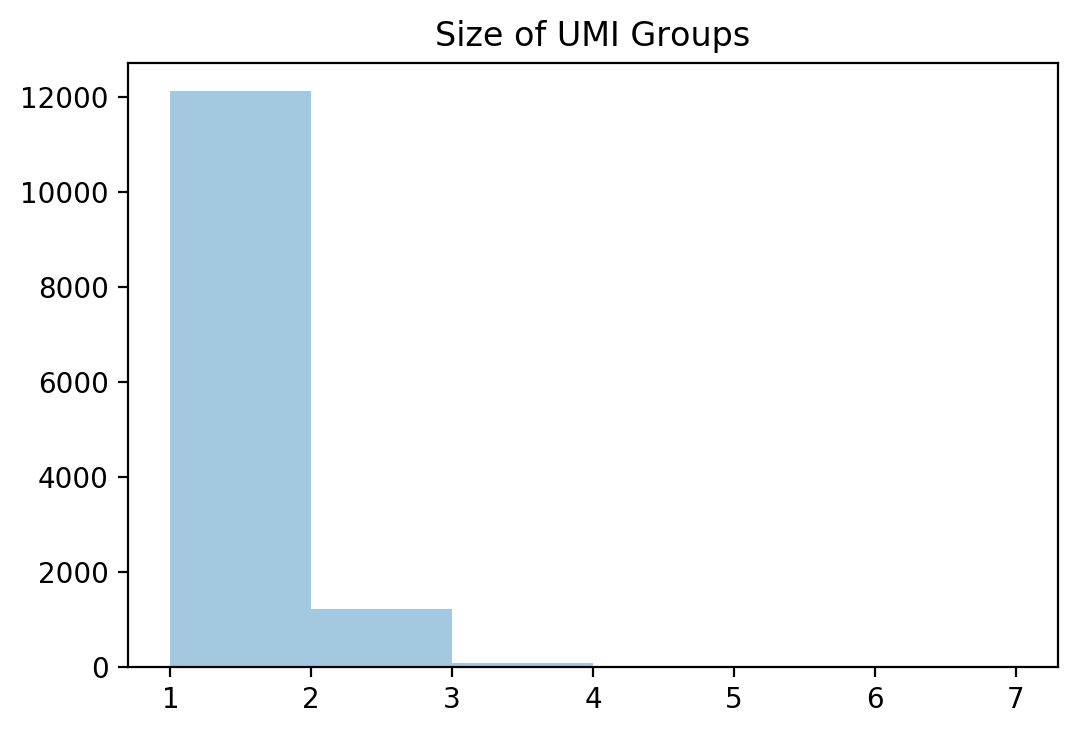

In [64]:
# Distribution of 
plt.figure( dpi=200 )
sns.distplot( [len( umi_dict[i] ) for i in umi_dict], kde=False, bins=6 )
plt.title( "Size of UMI Groups" )
plt.show()

In [5]:
# Percentage of UMI groups which are found in more than one sample. Currently 10.8% which is a bit high.
len( [i for i in umi_dict if len( umi_dict[i] ) > 1] ) / len( [i for i in umi_dict if len( umi_dict[i] ) == 1] )

0.10883567299752271

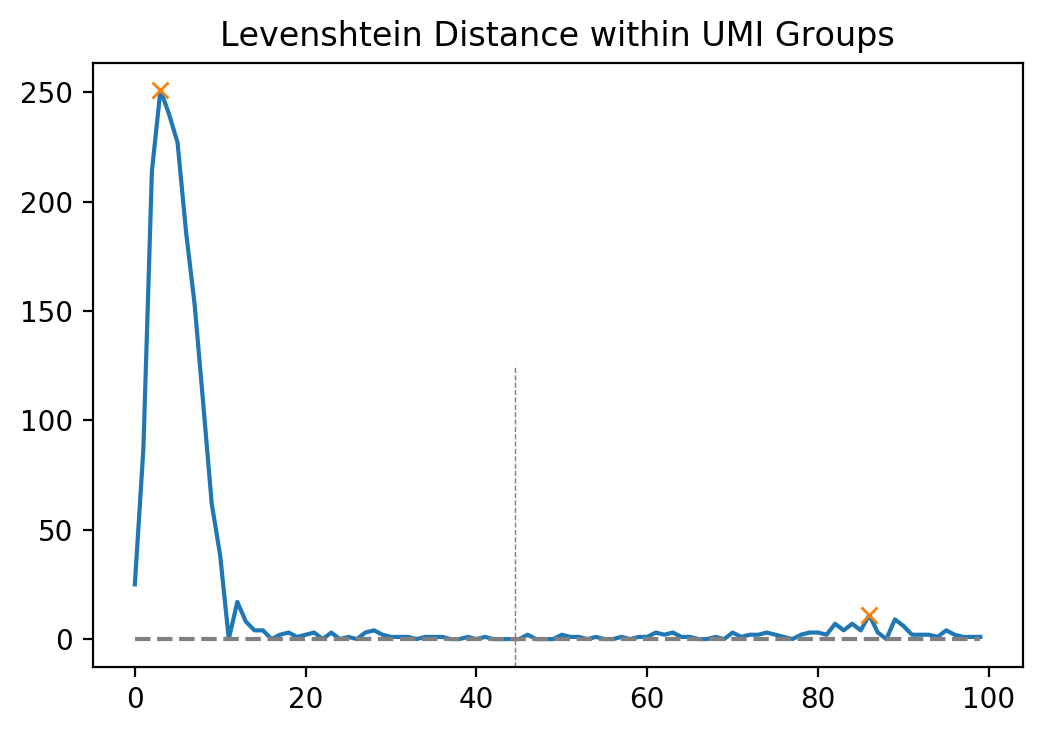

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import find_peaks 

umi_distances = list()
merge = 0
for i in umi_dict.items():
    if len( i[1] ) > 1:
        for j, seqA in enumerate( i[1] ):
            for k, seqB in enumerate( i[1] ):
                if j > k:
                    umi_distances.append( Levenshtein.distance( seqA, seqB ) )

help = np.histogram( umi_distances, bins=100)

peaks, _ = find_peaks( help[0], distance=10, prominence=(5,None))
collision_threshold = sum( peaks )/ len( peaks )

plt.figure( dpi=200 )
#help = sns.distplot(umi_distances, kde=False);
plt.plot(help[0])
plt.plot(peaks, help[0][peaks], "x")
plt.plot(np.zeros_like(help[0]), "--", color="gray")
plt.axvline( x=collision_threshold, ymax=0.5, linestyle="--", color="gray", linewidth=0.5 )
plt.title( "Levenshtein Distance within UMI Groups")
plt.show()

In [62]:
percent_collisions = 100 * sum( umi_distances > collision_threshold ) / sum( umi_distances < collision_threshold )
print( "UMIs associated with two sequences: {:.2f}%".format( percent_collisions ) ) 

UMIs associated with two sequences: 6.63%


In [8]:
for i in umi_dict.items():
    if len( i[1] ) > 1:
        distances = list()
        for j, seqA in enumerate( i[1] ):
            for k, seqB in enumerate( i[1] ):
                if j > k:
                    distances.append( Levenshtein.distance( seqA, seqB ) )
        if max( distances ) > collision_threshold:
            print( "{},{}".format( i[0], ",".join( i[1] ) ) )

TTGTATATTGGA,AAGCAGTTCCTTGTTGATCACGGCTTCCCGGGCAGCAGACACTGCTTCTTACTTCTGTGCTACGGACGCGTACAGTGGAGGTAGCAACTATAAACTGACATTTGGAAAAGGAACTCTCTTAACCGTGAATCCAAATATCCAGAACCCTGACCCCTCTC,CTTGTCCACTCTGACAGTGACCAGTGCCCATCCTGAAGACAGCAGCTTCTACATCTGCAGTGCCCGCGGCGCTGAGGGCGGGAGGGGGGATACGCAGTATTTTGCCCCAGGCACCCGGCTGACAGTGCTCGAGGACCTGAAAAACGTGTCT
TGGGGAGGTTTT,AAGAAAGGACAGTTCTCTCCACATCACTGCAGCCCAGACTGGTGATACAGGCCTCTACCTCTGTGCAGGAGATCGCAATAATGCAGGCAACATGCTCACCTTTGGAGGGGGAACAAGGTTAATGGTCAAACCCCATATCCAGAACCCTGACCCCTCTC,ATCCAAGACAGCTGGAGCTTCACAGAGCACATAGCAAGCAAGGGCATCCCATGCTCCCTGTTAACTGGTGAACAGTGAAAAGGATCCAAGCCTGACCTGAACATCCTCCAACAAGCTATATAAAATCAAAAGATCGTGATACCAGTGATCC
TCTAACCGGTGT,AGGGCGCCAGTTCTCTAACTCTCGCTCTGAGATGAATGTGAGCACCTTGGAGCTGGGGGACTCGGCCCTTTATCTTTGCGCCAGCAGCCAAACCTACGAGCAGTACTTCGGGCCGGGCACCAGGCTCACGGTCACAGAGGACCTGAAAAACGTGTAAAGA,GCCTAGGGGGTGGGGTACTCGCCCTTTTATATTGCCGCCAGACACCAAACGCAGAAGCAGTTCGCCGGGCCGGCCACCAGGCTCACGGTCAATGAGGCTCTGAACAAAGTATAAACAGAGCAGAAGGTCACGCGTTGAGTTTACGTGGCGG
ACTAGTCAGTGT,TAAAGCATGAGAC

In [9]:
umi_table = list()
for i in SAMPLES.items():
    with gzip.open( os.path.join( in_dir, i[1] ), "rt" ) as handle:
        for record in SeqIO.parse(handle, "fastq"):
            umi = record.description.split( ":" )[1]
            umi_count = int( record.description.split( ":" )[2] )
            seq = str( record.seq )
            umi_table.append( [umi, umi_count, seq, i[0] ] )
umi_table = pd.DataFrame( umi_table, columns=["UMI", "Reads", "Sequence", "Sample"] )
umi_table["Percent_Reads"] = umi_table["Reads"] / umi_table.groupby("Sample")["Reads"].transform( 'sum' )

In [47]:
test = umi_table.iloc[umi_table.groupby(['UMI']).groups['GCTTGAGTATAA']]
distances = list()
for i, j in enumerate( test["Sequence"] ):
    for k, l in enumerate( test["Sequence"] ):
        if k > i:
            distances.append( Levenshtein.distance( j, l ) )
transformed_seqs = np.array( test["Sequence"] ).reshape( -1, 1 )

distance_matrix = pdist( transformed_seqs, lambda x,y: Levenshtein.distance( x[0], y[0] ) )

print( squareform( distance_matrix ) )

[[ 0. 11.  5.  6.  9.  7.  7.]
 [11.  0.  9.  6.  5.  6.  6.]
 [ 5.  9.  0.  8.  6.  7.  6.]
 [ 6.  6.  8.  0.  5.  3.  3.]
 [ 9.  5.  6.  5.  0.  3.  3.]
 [ 7.  6.  7.  3.  3.  0.  3.]
 [ 7.  6.  6.  3.  3.  3.  0.]]


In [43]:
l1=[]
l2=[]

for y,x in umi_table.groupby( "UMI" ):#.count()#.sort_values( "Reads", ascending=False )
    transformed_seqs = np.array( x["Sequence"] ).reshape( -1, 1 )
    v = np.triu( pdist( transformed_seqs, lambda i,j: Levenshtein.distance( i[0], j[0] ) ), k=0 )

    v = np.ma.masked_equal( v, 0 )
    l2.append( np.mean( v ) )
    l1.append( y )


/usr/local/lib/python3.7/site-packages/numpy/ma/core.py:5188: RuntimeWarning: Mean of empty slice.
  dtype=dtype, **kwargs)[()]
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [49]:
test = pd.DataFrame( {'ave':l2}, index=l1 ).sort_values( "ave", ascending=False )

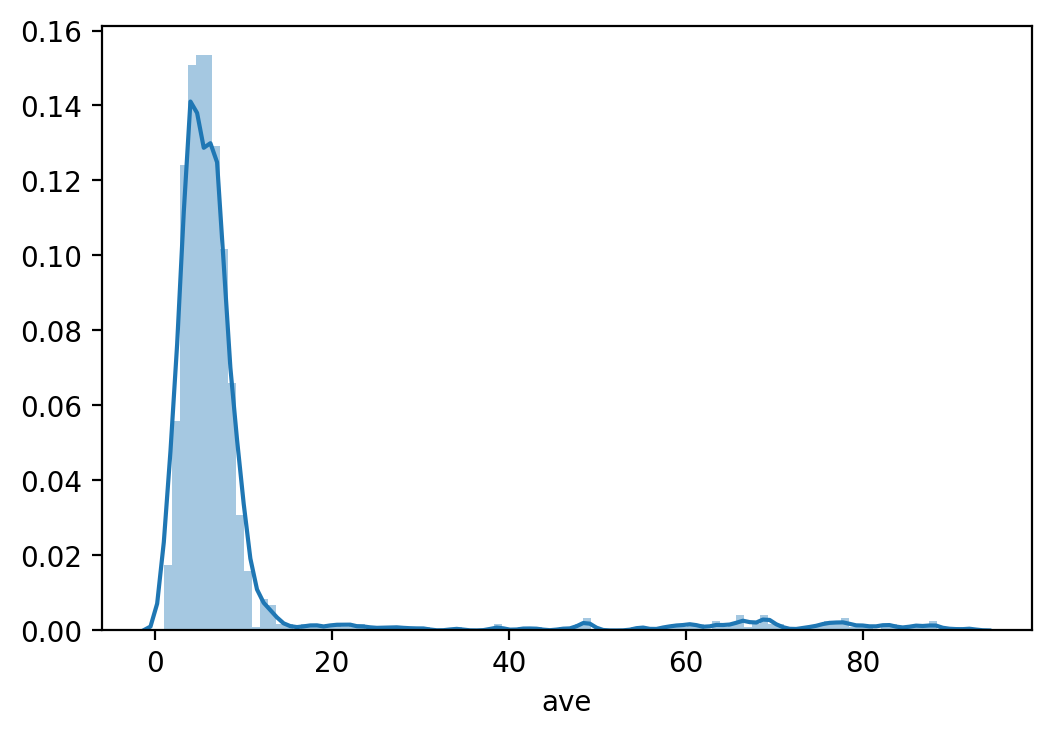

In [53]:
plt.figure( dpi=200 )
sns.distplot( test["ave"].dropna(), bins=100 )

In [60]:
test.dropna()

,ave
CGTATGAATTTT,92.000000
TCTAACCGGTGT,90.000000
AGCGAGGACATG,88.000000
CGCTTTCTGTTT,88.000000
GAATTCACATTG,88.000000
AAATAGAGTGTG,87.000000
ACTAGTCAGTGT,86.000000
GTAAACACGACG,86.000000
GTTAAGCTAGTT,85.000000
CCTGACATAAAA,84.000000


# Algorithm
Just going to brute force contamination here. 
 - Iterate through all the reads in all samples, 
     - add unique UMI-read pairs to dictionary<UMI,list of reads>. 
     - While iterating, check if read pair is already in unique umi-read dictionary. If it is then added umi-read pair to contaminating read dictionary.
     - If UMI is the same, but read is different, then add read to list of reads.
 - Once all reads have been checked, the algorithm with iterate again through the reads.

In [115]:
observed_umis = OrderedDict()
contaminant_reads = list()
# Iterate through all the samples.
for i in SAMPLES.items():
    with gzip.open( os.path.join( in_dir, i[1][1] ), "rt" ) as handle:
        # Iterate through all the reads in the sample
        for record in SeqIO.parse(handle, "fastq"):
            # Identify the UMI
            umi = record.description.split( ":" )[1]
            # check if this UMI has been observed before.
            if umi in observed_umis:
                # If it has then check the genetic distance between sequences associated with that UMI.
                for j in observed_umis[umi]:
                    if Levenshtein.distance( str( record.seq ), j[0] ) < 40:
                        # If the genetic distance is less than 40, likely result from the same molecule, i.e. contamination.
                        # check if UMI is in contaminant reads yet.
                        contaminant_reads.append( "{}-{}".format( i[0], record.id ) )
                        contaminant_reads.append( j[1] ) 
                    else:
                        observed_umis[umi].append( ( str( record.seq ), "{}-{}".format( i[0], record.id ) ) )
            else:
                observed_umis[umi] = [( str( record.seq ), "{}-{}".format( i[0], record.id ) )]

In [138]:
len( np.unique( contaminant_reads ) )

2725

In [133]:
with gzip.open( os.path.join( in_dir, SAMPLES["S3"][0] ), "rt" ) as handleR1, gzip.open( os.path.join( in_dir, SAMPLES["S3"][1] ), "rt" ) as handleR2:
    tempR1 = list()
    tempR2 = list()
    count = 0
    removed_reads = 0
    for records in zip( SeqIO.parse( handleR1, "fastq" ), SeqIO.parse( handleR2, "fastq" ) ):
        if "{}-{}".format( "S3", records[0].id ) not in contaminant_reads:
            tempR1.append( records[0] )
            tempR2.append( records[1] )
        else:
            removed_reads += 1
        count += 1
        

In [136]:
print( "Total Reads: {}".format( count ) ) 
print( "Removed Reads: {}".format( removed_reads ) )
print( "Remaining Reads: {}".format( len( tempR1 ) ) )

Total Reads: 171
Removed Reads: 21
Remaining Reads: 150


In [119]:
ID: MIG.1092
Name: MIG.1092
Description: MIG.1092 R2 UMI:CAGCATGGGGTA:24
Number of features: 0
Per letter annotation for: phred_quality
Seq('AGCTATTGTGTGTTCAGATATGTTAAAGCCACTTTCGTAGTTTATTTTGTGTCA...AAT', SingleLetterAlphabet())

ID: MIG.1092
Name: MIG.1092
Description: MIG.1092 R1 UMI:CAGCATGGGGTA:24
Number of features: 0
Per letter annotation for: phred_quality
Seq('TAGAAAATGTAGCCCATTTCTTGCCACCTCATGGGCTACACCTTGACCTAACGT...AAG', SingleLetterAlphabet())



Total: 3038 | Unique: 2725
13428
